<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/05_Numpy_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**More on numpy**

**(a)** Declare a 8x8 matrix and fill it with a checkerboard pattern, then randomly place p elements in a 2D array with np.put

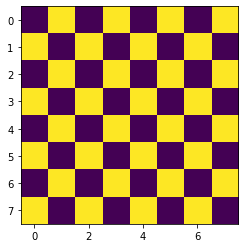

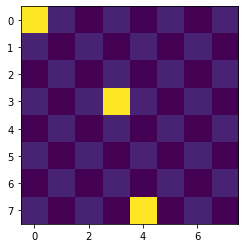

In [ ]:
import numpy as np
n=8
p = 3

Z = np.zeros((n,n))
Z[1::2,::2] = 1
Z[::2,1::2] = 1
import matplotlib.pyplot as plt
plt.imshow(Z)
plt.show()

np.put(Z, np.random.choice(range(n*n), p, replace=False),10)
plt.imshow(Z)
plt.show()

**(b)** Normalize a 5x5 random matrix (between 0 and 1)

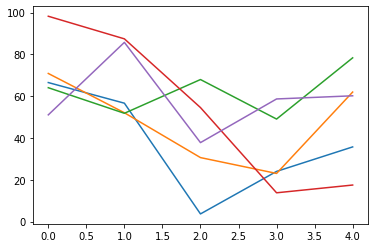

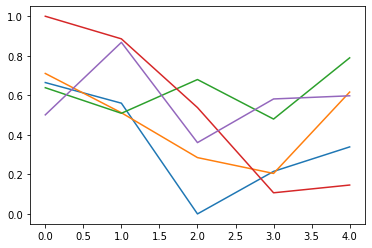

In [ ]:
Z = np.random.normal(50, 25, (5,5))
Zmax,Zmin = Z.max(), Z.min()
Znorm = (Z - Zmin)/(Zmax - Zmin)
plt.plot(Z)
plt.show()
plt.plot(Znorm)
plt.show()

**(c)** Multiply a 5x5 array by a 5x1 array, treat arrays as matrix by using `np.dot` (compare real matrix product and product of array multiplication). 
change order in np.dot 1x5 and 5x5

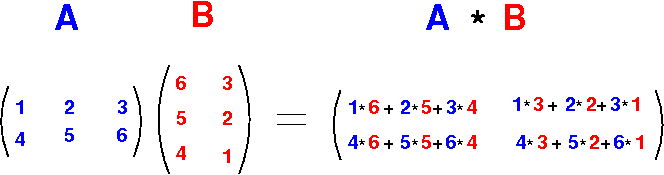

In [ ]:
print(np.ones((5,5))*np.ones((5,1)))
print(np.dot(np.ones((1,5)),np.ones((5,5))))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[5. 5. 5. 5. 5.]]


**(d)** Consider a random 100x2 matrix representing cartesian coordinates, convert them to polar coordinates

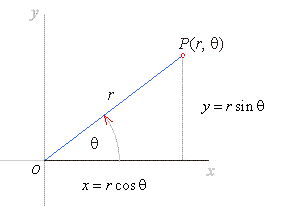


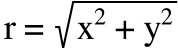


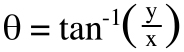

In [ ]:
Z = np.random.random((100,2))
X,Y = Z[:,0], Z[:,1]
R = np.sqrt(X**2+Y**2)
T = np.arctan2(Y,X)

**(e)** find point by point distances for coordinates from **d** and calculate total distance

Hint: np.atleast_2d

In [ ]:
X,Y = np.atleast_2d(Z[:,0]), np.atleast_2d(Z[:,1])
D = np.sqrt(X**2 + Y**2)
print(np.sum(D))

75.73444248737572


**(f)**  create a four dimensions array and get sum over the last two axis at once

In [ ]:
A = np.random.randint(0,10,(3,4,2,3))
# solution by passing a tuple of axes (introduced in numpy 1.7.0)
sum = A.sum(axis=(-2,-1))
print(sum)
# solution by flattening the last two dimensions into one
# (useful for functions that don't accept tuples for axis argument)
sum = A.reshape(A.shape[:-2] + (-1,)).sum(axis=-1)
print(sum)

[[29 43 22 32]
 [29 27 31 35]
 [25 34 29 33]]
[[29 43 22 32]
 [29 27 31 35]
 [25 34 29 33]]


(g) Write a function rolling mean that returns an array of local k-point mean values, where each mean is calculated over a sliding window of length k across neighboring elements of A

bonus - define rolling median and make a weighted moving averages and median

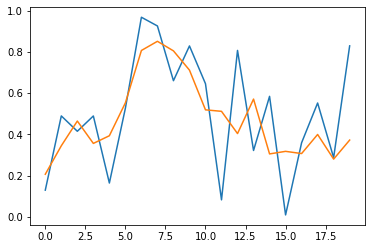

(20,) (20,)


In [ ]:
def moving_average(a, n=3):
  a=np.insert(a, [0,-1], 0)
  ret = np.cumsum(a, dtype=float)
  ret[n:] = ret[n:] - ret[:-n]
  return ret[n - 1:] / n
Z = np.random.random(20)
Z_avg = moving_average(Z, n=3)
plt.plot(Z)
plt.plot(Z_avg)
plt.show()

print(Z.shape, Z_avg.shape)